In [2]:
pip install pandas seaborn openpyxl numpy scipy wordcloud pymorphy3 nltk razdel sentence_transformers wiki-ru-wordnet

     ---------------------------------------- 0.0/20.6 MB ? eta -:--:--
     - -------------------------------------- 0.5/20.6 MB 12.8 MB/s eta 0:00:02
     ------ --------------------------------- 3.4/20.6 MB 8.9 MB/s eta 0:00:02
     ---------- ----------------------------- 5.2/20.6 MB 10.3 MB/s eta 0:00:02
     -------------- ------------------------- 7.3/20.6 MB 10.0 MB/s eta 0:00:02
     ------------------ --------------------- 9.4/20.6 MB 9.6 MB/s eta 0:00:02
     ------------------- -------------------- 10.2/20.6 MB 8.3 MB/s eta 0:00:02
     ----------------------- ---------------- 12.1/20.6 MB 8.4 MB/s eta 0:00:02
     ---------------------------- ----------- 14.7/20.6 MB 9.1 MB/s eta 0:00:01
     ------------------------------ --------- 15.7/20.6 MB 9.1 MB/s eta 0:00:01
     ---------------------------------- ----- 17.8/20.6 MB 8.8 MB/s eta 0:00:01
     -------------------------------------- - 19.9/20.6 MB 8.9 MB/s eta 0:00:01
     ---------------------------------------- 20.6

  DEPRECATION: Building 'wiki-ru-wordnet' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'wiki-ru-wordnet'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv('train_hackathon_dataset_cloned.csv') # изменить путь
df = pd.read_json('win_dataset_copy.json')
df

,idx,text,label
0,1261,общество с ограниченной ответственностью [orga...,Блок бизнес-директора
1,1261_1,общество с ограниченной ответственностью [orga...,Блок бизнес-директора
2,1261_1,общество с ограниченной ответственностью [orga...,Блок бизнес-директора
3,1261_1_new,общество с ограниченной ответственностью [orga...,Блок бизнес-директора
4,1261_1_new,общество с ограниченной ответственностью [orga...,Блок бизнес-директора
...,...,...,...
2343,5647,научный руководитель по нир и взаимодействию с...,Управление по проектным работам
2344,5675,[organization] [location] тел.: [contact] e-ma...,Управление по проектным работам
2345,5677,[organization] [location] [contact] [id] [date...,Управление по проектным работам
2346,5694,[organization] акционерное общество но гнвн-гн...,Управление по проектным работам


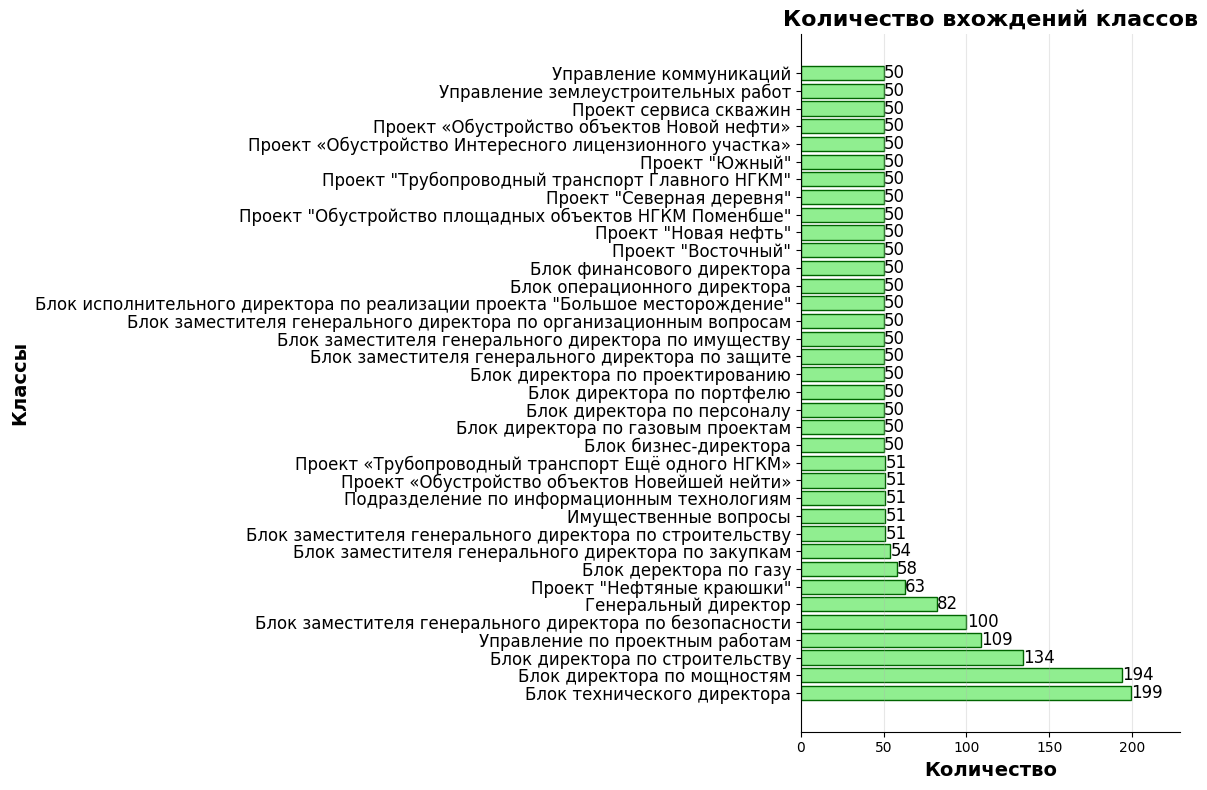

In [3]:
# Распределение меток (классов)
lbs = df['label']
lbs_uniq = lbs.unique()

# Считаем количество меток и сортируем их
lbs_uniq_count = {}
for i in lbs_uniq:
    lbs_uniq_count[i] = len(list(filter(lambda x: x == i, lbs)))
lbs_uniq_count = sorted(lbs_uniq_count.items(), key=lambda item: -item[1]) 

# Выводим в виде гистограммы
df_lbs_count = pd.DataFrame(lbs_uniq_count, columns=['string', 'count'])
    
fig, ax = plt.subplots(figsize=(12, 8))

# Горизонтальные столбцы
bars = ax.barh(df_lbs_count['string'], df_lbs_count['count'], color='lightgreen', edgecolor='darkgreen')

# Добавляем подписи значений
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2.,
            f'{int(width)}', ha='left', va='center', fontsize=12)

# Настраиваем внешний вид
ax.set_ylabel('Классы', fontsize=14, fontweight='bold')
ax.set_xlabel('Количество', fontsize=14, fontweight='bold')
ax.set_title('Количество вхождений классов', fontsize=16, fontweight='bold')

# Метки на оси Y без поворота
ax.set_yticks(range(len(df_lbs_count['string'])))
ax.set_yticklabels(df_lbs_count['string'], rotation=0, fontsize=12)

ax.grid(axis='x', alpha=0.3)
ax.set_xlim(0, max(df_lbs_count['count']) * 1.15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [10]:
lbs_uniq_count

[('Блок технического директора', 199),
 ('Блок директора по мощностям', 194),
 ('Блок директора по строительству', 134),
 ('Управление по проектным работам', 109),
 ('Блок заместителя генерального директора по безопасности', 100),
 ('Генеральный директор', 82),
 ('Проект "Нефтяные краюшки"', 63),
 ('Блок деректора по газу', 58),
 ('Блок заместителя генерального директора по закупкам', 54),
 ('Блок заместителя генерального директора по организационным вопросам', 46),
 ('Проект сервиса скважин', 38),
 ('Блок директора по проектированию', 35),
 ('Проект "Новая нефть"', 30),
 ('Проект "Северная деревня"', 29),
 ('Блок операционного директора', 26),
 ('Блок директора по газовым проектам', 25),
 ('Блок заместителя генерального директора по защите', 21),
 ('Блок финансового директора', 21),
 ('Блок директора по портфелю', 19),
 ('Управление землеустроительных работ', 18),
 ('Проект "Трубопроводный транспорт Главного НГКМ"', 16),
 ('Блок директора по персоналу', 14),
 ('Проект «Обустройство об

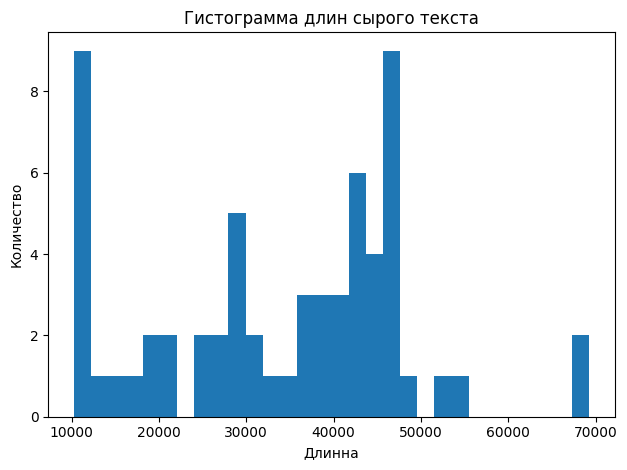

In [ ]:
data = pd.DataFrame(filter(lambda x: x > 10000, map(len, df['text'])))

plt.figure()
plt.hist(data, bins=30)
plt.title("Гистограмма длин сырого текста")
plt.xlabel("Длинна"); plt.ylabel("Количество")
plt.tight_layout(); plt.show()

In [9]:
pip install nltk pymorphy3

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 8.0 MB/s  0:00:00
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   -------- ------------------------------- 1.8/8.4 MB 9.6 MB/s eta 0:00:01
   ------------------- -------------------- 4.2/8.4 MB 10.9 MB/s eta 0:00:01
   ------------------------------- -------- 6.6/8.4 MB 10.8 MB/s eta 0:00:01
   ---------------------------------------- 8.4/8.4 MB 10.8 MB/s  0:00:00

   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   --------------------

In [16]:
import pandas as pd
from collections import Counter
import string
from nltk.corpus import stopwords
import nltk

labels_llmed = ['Проект "Северная деревня"','Блок операционного директора','Блок директора по газовым проектам','Блок заместителя генерального директора по защите','Блок финансового директора','Блок директора по портфелю','Управление землеустроительных работ','Проект "Трубопроводный транспорт Главного НГКМ"','Блок директора по персоналу','Проект «Обустройство объектов Новой нефти»','Проект "Восточный"','Блок заместителя генерального директора по имуществу','Проект "Южный"','Блок бизнес-директора','Управление коммуникаций','Проект «Обустройство Интересного лицензионного участка»','Блок исполнительного директора по реализации проекта "Большое месторождение"','Проект "Обустройство площадных объектов НГКМ Поменбше"','Подразделение по информационным технологиям','Имущественные вопросы','Проект «Трубопроводный транспорт Ещё одного НГКМ»','Блок заместителя генерального директора по строительству','Проект «Обустройство объектов Новейшей нейти»']

# Скачиваем стоп-слова если нужно
nltk.download('stopwords')

# Пример датасета


# Альтернативная версия функции для русского текста с учетом морфологии
import pymorphy3 as pymorphy2

morph = pymorphy2.MorphAnalyzer()

def preprocess_text_ru(text):
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    words = text.split()
    stop_words = set(stopwords.words('russian'))
    # Приводим слова к нормальной форме
    words = [morph.parse(word)[0].normal_form for word in words]
    words = [word for word in words if word not in stop_words and len(word) > 2]
    return words

# Собираем все слова
# df_sel = df[(~(df['idx'].str.contains('_LLM'))) & (df['label'].isin(labels_llmed))]
df_sel = df[df['idx'].str.contains('_LLM')]
all_words = []
for text in df_sel['text']:
    all_words.extend(preprocess_text_ru(text))

# Считаем частоты
word_freq = Counter(all_words)

# Получаем N самых частых слов
N = 30
most_common_words = word_freq.most_common(N)

print(f"{N} самых частых слов:")
for word, freq in most_common_words:
    print(f"{word}: {(freq / len(df_sel)):.4f}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\k4484\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


30 самых частых слов:
organization: 4.9920
datetime: 4.6293
person: 4.3200
contact: 3.1840
documentnumber: 2.7600
financialdata: 2.0853
object: 2.0773
location: 1.5520
приложение: 1.0933
директор: 0.9733
объект: 0.9440
документ: 0.9227
электронный: 0.8107
уважаемый: 0.7813
адрес: 0.7280
работа: 0.7120
number: 0.6933
заместитель: 0.6587
проект: 0.6533
телефон: 0.6240
генеральный: 0.6133
организация: 0.6027
также: 0.6027
договор: 0.6000
ооо: 0.5520
рамка: 0.5413
комиссия: 0.5387
письмо: 0.5067
просить: 0.4933
соответствие: 0.4907


In [ ]:
organization: 6.6341
datetime: 5.1957
person: 4.8333
contact: 3.5580
documentnumber: 3.3877
financialdata: 3.1703
object: 2.4457
location: 1.7138
объект: 1.2754
приложение: 1.1087
работа: 0.9855
директор: 0.9783
уважаемый: 0.9239
адрес: 0.8623
тело: 0.8514
email: 0.7862
договор: 0.7355
number: 0.7319
организация: 0.7210
просить: 0.6486
генеральный: 0.6449
проект: 0.6377
заместитель: 0.6341
документ: 0.6304
ооо: 0.6159
проведение: 0.6123
соответствие: 0.6014
письмо: 0.5833
далее: 0.5507
нефть: 0.5254

In [17]:
tag_dict = {'[PROJECT]': 'проект_тег',
 '[TYPE]': 'тип_тег',
 '[SIZE]': 'размер_тег',
 '[НОМЕР_ОБЪЕКТА]': 'номер_объекта_тег',
 '[REGIONAL_OFFICE]': 'региональный_офис_тег',
 '[NUMBER]': 'число_тег',
 '[MUNICIPAL_DISTRICT]': 'муниципальный_округ_тег',
 '[OGRN]': 'огрн_тег',
 '[CITY]': 'город_тег',
 '[TIME]': 'время_тег',
 '[DIMENSIONS]': 'размеры_тег',
 '[NUMBER_OF_PAGES]': 'количество_страниц_тег',
 '[PRODUCT]': 'продукт_тег',
 '[SIGNATURE]': 'подпись_тег',
 '[SERVICE_AREA]': 'зона_обслуживания_тег',
 '[LAW_NUMBER]': 'номер_закона_тег',
 '[QUANTITY]': 'количество_тег',
 '[PAGE]': 'страница_тег',
 '[PRODUCT_MARK]': 'марка_продукта_тег',
 '[PROJECT_NUMBER]': 'номер_проекта_тег',
 '[EXECUTIVE_DIRECTOR]': 'исполнительный_директор_тег',
 '[TEMPERATURE]': 'температура_тег',
 '[DOMAIN]': 'домен_тег',
 '[FILIAL]': 'филиал_тег',
 '[DATE]': 'дата_тег',
 '[KPP]': 'кпп_тег',
 '[VOLUME]': 'объем_тег',
 '[RESOURCE_TYPES]': 'типы_ресурсов_тег',
 '[SKVAGH_NUMBER]': 'номер_скваха_тег',
 '[DIAGNOSIS]': 'диагностика_тег',
 '[PAGE_NUMBER]': 'номер_страницы_тег',
 '[FRACTION]': 'фракция_тег',
 '[WORK_TYPE]': 'тип_работы_тег',
 '[ELECTRONIC_SIGNATURE]': 'электронная_подпись_тег',
 '[DOCUMENT_SIGNATURE]': 'подпись_документа_тег',
 '[NETWORK]': 'сеть_тег',
 '[NAME_OF_FIELD]': 'название_поля_тег',
 '[DISTANCE]': 'расстояние_тег',
 '[AUTONOMOUS_REGION]': 'автономная_область_тег',
 '[URL]': 'url-адрес_тег',
 '[DISTRICT]': 'округ_тег',
 '[DIRECTOR]': 'директор_тег',
 '[PLACE]': 'место_тег',
 '[PLAN]': 'план_тег',
 '[CHEMICAL_REAGENT]': 'химический_реагент_тег',
 '[WWW]': 'www_тег',
 '[TITLE]': 'заголовок_тег',
 '[PROJECT_NAME]': 'название_проекта_тег',
 '[PHONE_PROVIDER]': 'телефонный_провайдер_тег',
 '[SYSTEM]': 'система_тег',
 '[REGION]': 'область_тег',
 '[ID]': 'идентификатор_тег',
 '[LICENSE]': 'лицензия_тег',
 '[CURRENCY]': 'валюта_тег',
 '[BIC]': 'бик_тег',
 '[PIPELINE]': 'трубопровод_тег',
 '[AREA]': 'область_тег',
 '[RIVER]': 'река_тег',
 '[DEPOSITS]': 'депозиты_тег',
 '[ЛОКАЦИЯ]': 'локация_тег',
 '[ACTIVITY]': 'активность_тег',
 '[LENGTH]': 'длина_тег',
 '[DELIVERY_DATE]': 'дата_доставки_тег',
 '[BANK_ID]': 'идентификатор_банка_тег',
 '[YEAR]': 'год_тег',
 '[JOB_TITLE]': 'должность_тег',
 '[TYPE_OF_ORDER]': 'тип_заказа_тег',
 '[WORK]': 'работа_тег',
 '[CERTIFICATE]': 'сертификат_тег',
 '[DEVICE]': 'устройство_тег',
 '[STANDARD]': 'стандарт_тег',
 '[REPUBLIC]': 'республика_тег',
 '[SPEED]': 'скорость_тег',
 '[НОМЕР_ДОКУМЕНТА]': 'номер_документа_тег',
 '[ADDRESS]': 'адрес_тег',
 '[ROOM]': 'комната_тег',
 '[PERIOD]': 'период_тег',
 '[MODEL]': 'модель_тег',
 '[TDU]': 'тду_тег',
 '[MINISTRY]': 'министерство_тег',
 '[BUILDING_NUMBER]': 'номер_здания_тег',
 '[KPZ]': 'кпз_тег',
 '[ORGANIZATION]': 'организация_тег',
 '[EVENT]': 'событие_тег',
 '[ORGANIZATION_ID]': 'идентификатор_организации_тег',
 '[STAGE]': 'этап_тег',
 '[POSITION]': 'позиция_тег',
 '[COPY_COUNT]': 'счет_копий_тег',
 '[PROCESSING_STANDARD]': 'стандарт_обработки_тег',
 '[EMAIL]': 'электронная_почта_тег',
 '[SNAB]': 'снаб_тег',
 '[АДРЕС_ЭЛ_ПОЧТЫ]': 'адрес_эл_почты_тег',
 '[DIVISION]': 'разделение_тег',
 '[ACTION]': 'действие_тег',
 '[MARK]': 'отметка_тег',
 '[INSTRUMENT_TYPE]': 'тип_прибора_тег',
 '[POSTAL_CODE]': 'почтовый_индекс_тег',
 '[STAND]': 'стоять_тег',
 '[VALUE]': 'ценить_тег',
 '[COPIES]': 'копии_тег',
 '[POSTCODE]': 'почтовый_индекс_тег',
 '[BANK]': 'банк_тег',
 '[STORAGE_PRICE]': 'цена_хранения_тег',
 '[OFFICE]': 'офис_тег',
 '[LETTER]': 'письмо_тег',
 '[DEPARTMENT]': 'отделение_тег',
 '[AMOUNT]': 'количество_тег',
 '[LAYER]': 'слой_тег',
 '[WIND_DIRECTION]': 'направление_ветра_тег',
 '[REGIONAL_AREA]': 'региональная_область_тег',
 '[SPECIFICATION]': 'спецификация_тег',
 '[CATEGORY]': 'категория_тег',
 '[CONFERENCING]': 'конференции_тег',
 '[PROJECT_CODE]': 'код_проекта_тег',
 '[REGULATORY_INTERACTION]': 'нормативное_взаимодействие_тег',
 '[WAREHOUSE_LIMIT]': 'складский_лимит_тег',
 '[OPERATOR]': 'оператор_тег',
 '[PRICE_PER_UNIT]': 'цена_за_единицу_тег',
 '[TOPIC]': 'тема_тег',
 '[CODE]': 'код_тег',
 '[UNIT]': 'единица_тег',
 '[WEBSITE]': 'веб-сайт_тег',
 '[OPERATION]': 'эксплуатация_тег',
 '[ДАТА]': 'данные_тег',
 '[SECTION]': 'раздел_тег',
 '[TABLE_NUMBER]': 'номер_таблицы_тег',
 '[COUNTRY]': 'страна_тег',
 '[VH_NO]': 'вх_нет_тег',
 '[LOCATION]': 'расположение_тег',
 '[CONNECTION_TYPE]': 'тип_соединения_тег',
 '[FINANCИAL_DATA]': 'финансовые_данные_тег',
 '[DIMENSION]': 'измерение_тег',
 '[SOFTWARE]': 'программное_обеспечение_тег',
 '[NOTES]': 'примечания_тег',
 '[INTERNAL_REGULATION]': 'внутреннее_правило_тег',
 '[P]': 'п_тег',
 '[ENGINE_MODEL]': 'модель_двигателя_тег',
 '[PROTOCOL]': 'протокол_тег',
 '[LICENSED_AREA]': 'лицензированная_зона_тег',
 '[INDIVIDUAL_PREMISE]': 'индивидуальное_помещение_тег',
 '[ИМЯ_ЧЕЛОВЕКА]': 'имя_человека_тег',
 '[FUNCTION]': 'функция_тег',
 '[PROSPECT]': 'перспектива_тег',
 '[SCHEME]': 'схема_тег',
 '[GAS_PIPELINE]': 'газопровод_тег',
 '[STANDARD_NUMBER]': 'стандартный_номер_тег',
 '[LAND_TYPE]': 'тип_земли_тег',
 '[INN]': 'гостиница_тег',
 '[SERVICE_CODE]': 'сервисный_код_тег',
 '[DO]': 'делать_тег',
 '[COPY]': 'копировать_тег',
 '[VEHICLE]': 'транспортное_средство_тег',
 '[INN_KPP]': 'инн_кпп_тег',
 '[SUBORGANIZATION]': 'суборганизация_тег',
 '[CONDITIONS]': 'условия_тег',
 '[REPRESENTATIVE]': 'представитель_тег',
 '[NPS_AREA]': 'зона_аэс_тег',
 '[DOCUMENT_NUMBER]': 'номер_документа_тег',
 '[PROFESSION]': 'профессия_тег',
 '[BRANCH]': 'ветвь_тег',
 '[HOUSE]': 'дом_тег',
 '[CONFERENCING_LINK]': 'ссылка_на_конференцию_тег',
 '[CENTRE]': 'центр_тег',
 '[BRAND]': 'бренд_тег',
 '[ОБЛАСТЬ]': 'область_тег',
 '[НОМЕР_ТЕЛЕФОНА]': 'номер_телефона_тег',
 '[NAME]': 'имя_тег',
 '[NOMINATION_2]': 'номинация_2_тег',
 '[REGULATORY_DOCUMENT]': 'нормативный_документ_тег',
 '[GEN_DIR]': 'общий_директор_тег',
 '[ORGANIZATION_NUMBER]': 'номер_организации_тег',
 '[PERSON]': 'человек_тег',
 '[ADMINISTRATION]': 'администрация_тег',
 '[OBJECT]': 'объект_тег',
 '[GROUP]': 'группа_тег',
 '[OKPO]': 'окпо_тег',
 '[THICKNESS]': 'толщина_тег',
 '[ROUTE]': 'маршрут_тег',
 '[PAGE_COUNT]': 'счет_страниц_тег',
 '[PRODUCT_CODE]': 'код_продукта_тег',
 '[PAGES]': 'страницы_тег',
 '[DOCUMENT]': 'документ_тег',
 '[CONDITION]': 'состояние_тег',
 '[VEHICLE_TYPE]': 'тип_автомобиля_тег',
 '[FIELD]': 'поле_тег',
 '[PHONE]': 'телефон_тег',
 '[ETHNIC_GROUP]': 'этническая_группа_тег',
 '[MANAGER]': 'менеджер_тег',
 '[RECONSTRUCTION]': 'реконструкция_тег',
 '[FINANCIAL_DIRECTOR]': 'финансовый_директор_тег',
 '[НАЗВАНИЕ_КОМПАНИИ]': 'название_компании_тег',
 '[COMPETITION_NAME]': 'название_конкурса_тег',
 '[SERVICES]': 'услуги_тег',
 '[MEASURES]': 'меры_тег',
 '[DESCRIPTION]': 'описание_тег',
 '[RESOLUTION]': 'разрешение_тег',
 '[DEPTH]': 'глубина_тег',
 '[HALL]': 'зал_тег',
 '[FINANCИАL_DATA]': 'финансовые_данные_тег',
 '[GOVERNMENT]': 'правительство_тег',
 '[CENTRAL_BANK_OF_RUSSIA]': 'центральный_банк_россии_тег',
 '[COPY_TO]': 'копировать_в_тег',
 '[COMPRESSOR_MODEL]': 'модель_компрессора_тег',
 '[ISLAND]': 'остров_тег',
 '[DIRECTION]': 'направление_тег',
 '[PRODUCT_TYPE]': 'тип_продукта_тег',
 '[MONTH]': 'месяц_тег',
 '[GENERAL_DIRECTOR]': 'генеральный_директор_тег',
 '[STATION]': 'станция_тег',
 '[POST_CODE]': 'почтовый_индекс_тег',
 '[WEB]': 'веб_тег',
 '[WORKPLACE]': 'рабочое_место_тег',
 '[OFFICE_NUMBER]': 'номер_офиса_тег',
 '[MAX_QUANTITY_ON_WAREHOUSE]': 'макс._количество_на_складе_тег',
 '[FINANCИАЛЬ_ДАННЫЕ]': 'финансовые_данные_тег',
 '[QUARTER]': 'четверть_тег',
 '[FINANCИАЛЬ_DATA]': 'финансовые_данные_тег',
 '[FINANCIAL_DATA]': 'финансовые_данные_тег',
 '[DATE_RANGE]': 'диапазон_дат_тег',
 '[YEAR+1]': 'год+1_тег',
 '[DATE_TIME]': 'дата_время_тег',
 '[DOCUMENT_TYPE]': 'тип_документа_тег',
 '[FILE_EXTENSION]': 'расширение_файла_тег',
 '[ZIP_CODE]': 'почтовый_индекс_тег',
 '[CONTACT]': 'контакт_тег',
 '[ВРЕМЯ]': 'время_тег',
 '[FILE_SIZE]': 'размер_файла_тег',
 '[MUNICIPAL_AREA]': 'муниципальный_район_тег',
 '[INSTITUTION]': 'учреждение_тег',
 '[TAX_ID]': 'налоговый_идентификатор_тег',
 '[TOTAL_PRICE]': 'общая_цена_тег'}

In [31]:
import random
from deep_translator import GoogleTranslator
import time
import re

In [ ]:
df = pd.read_csv('augmented_only_trans.csv.csv')

In [ ]:
labels = [('Блок технического директора', 199),
          ('Блок директора по мощностям', 194),
          ('Блок директора по строительству', 134),
          ('Управление по проектным работам', 109),
          ('Блок заместителя генерального директора по безопасности', 100),
          ('Генеральный директор', 82),
          ('Проект "Нефтяные краюшки"', 63),
          ('Блок деректора по газу', 58),
          ('Блок заместителя генерального директора по закупкам', 54),
          ('Блок заместителя генерального директора по организационным вопросам', 46),
          ('Проект сервиса скважин', 38),
          ('Блок директора по проектированию', 35),
          ('Проект "Новая нефть"', 30),
          ('Проект "Северная деревня"', 29),
          ('Блок операционного директора', 26),
          ('Блок директора по газовым проектам', 25),
          ('Блок заместителя генерального директора по защите', 21),
          ('Блок финансового директора', 21),
          ('Блок директора по портфелю', 19),
          ('Управление землеустроительных работ', 18),
          ('Проект "Трубопроводный транспорт Главного НГКМ"', 16),
          ('Блок директора по персоналу', 14),
          ('Проект «Обустройство объектов Новой нефти»', 14),
          ('Проект "Восточный"', 14),
          ('Блок заместителя генерального директора по имуществу', 14),
          ('Проект "Южный"', 10),
          ('Блок бизнес-директора', 6),
          ('Управление коммуникаций', 6),
          ('Проект «Обустройство Интересного лицензионного участка»', 6),
          ('Блок исполнительного директора по реализации проекта "Большое месторождение"',
           5),
          ('Проект "Обустройство площадных объектов НГКМ Поменбше"', 5),
          ('Подразделение по информационным технологиям', 2),
          ('Имущественные вопросы', 2),
          ('Проект «Трубопроводный транспорт Ещё одного НГКМ»', 2),
          ('Блок заместителя генерального директора по строительству', 2),
          ('Проект «Обустройство объектов Новейшей нейти»', 2)]

In [37]:
def clean_text_spaces(df):
    """
    Удаляет все двойные пробелы, переносы строк и табуляции из столбца 'text' DataFrame
    
    Parameters:
    df (pd.DataFrame): Входной DataFrame
    
    Returns:
    pd.DataFrame: DataFrame с очищенным столбцом 'text'
    """
    # Создаем копию DataFrame, чтобы не изменять оригинал
    result_df = df.copy()
    
    # Применяем замены к столбцу 'text'
    result_df['text'] = result_df['text'].astype(str).apply(
        lambda x: re.sub(r'\s+', ' ', x).strip()
    )
    
    return result_df

def low(df):
    df_copy = df.copy()
    # Заполняем NaN пустой строкой и приводим всё к str, затем в нижний регистр
    df_copy['text'] = df_copy['text'].fillna('').astype(str).str.lower()
    return df_copy

def replace_tags_in_text(text: str):
    for tag in tag_dict:
        text = text.replace(tag, tag_dict[tag])
    return text

def replace_tags(df):
    df_copy = df.copy()
    
    df_copy['text'] = df_copy['text'].astype(str).apply(replace_tags_in_text)
    
    return df_copy

df = replace_tags(df)
df = low(df)
df = clean_text_spaces(df)

df.to_csv('LLM_translate_augmented_clean.csv')